In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('D:/Trafic_Chines/Trafic_Chines')
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
class_names = [ 'Speed limit (20km/h)','Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 
'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 
'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 
'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 
'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow','Wild animals crossing', 'End speed + passing limits', 
'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 
'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons' ]

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))#dẫn đường dẫn tới tư mục train
    images = os.listdir(path)#lấy ra danh sách các thư mực trong tập train
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [3]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
np.save('D:/Trafic_Chines/Trafic_Chines/training/data',data)
np.save('D:/Trafic_Chines/Trafic_Chines/training/target',labels)

data=np.load('D:/Trafic_Chines/Trafic_Chines/training/data.npy')
labels=np.load('D:/Trafic_Chines/Trafic_Chines/training/target.npy')

(39209, 30, 30, 3) (39209,)


In [4]:
train_images,test_images,train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [5]:
train_images.shape

(27446, 30, 30, 3)

In [6]:
len(train_labels)

27446

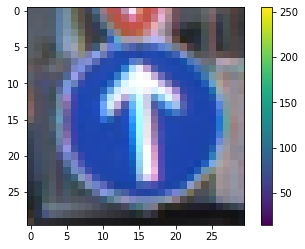

In [7]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
from keras.utils import to_categorical
train_images = train_images / 255.0

test_images = test_images / 255.0

train_labels = to_categorical(train_labels, 43)
test_labels = to_categorical(test_labels, 43)

In [9]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
858/858 [==============================] - 131s 152ms/step - loss: 0.4141 - accuracy: 0.8934 - val_loss: 0.1418 - val_accuracy: 0.9594
Epoch 2/10
858/858 [==============================] - 119s 138ms/step - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0421 - val_accuracy: 0.9876
Epoch 3/10
858/858 [==============================] - 113s 132ms/step - loss: 0.0313 - accuracy: 0.9911 - val_loss: 0.0469 - val_accuracy: 0.9873
Epoch 4/10
858/858 [==============================] - 118s 137ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 5/10
858/858 [==============================] - 229s 266ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0346 - val_accuracy: 0.9899
Epoch 6/10
858/858 [==============================] - 222s 258ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.0303 - val_accuracy: 0.9920
Epoch 7/10
858/858 [==============================] - 271s 316ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.0403 -

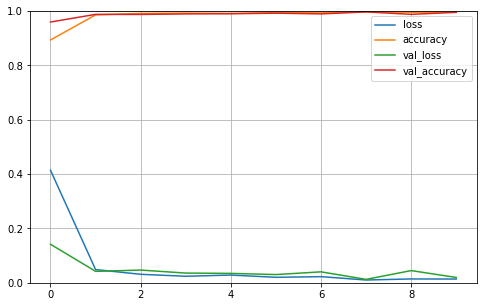

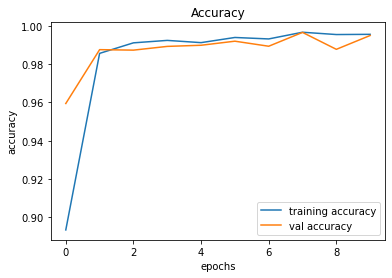

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

368/368 - 20s - loss: 0.0196 - accuracy: 0.9950

Test accuracy: 0.9949842691421509


In [49]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [70]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Right-of-way at intersection


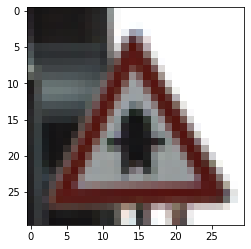

In [93]:
plot,prediction = test_on_img(r'D:/Trafic_Chines/Trafic_Chines\Test\00070.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()